### Amazon Stock LSTM

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [51]:
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Loading Data

In [52]:
ticker = 'AMZN'
df= yf.download(ticker, '2020-01-01' )

/tmp/ipython-input-52-1994804211.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df= yf.download(ticker, '2020-01-01' )
[*********************100%***********************]  1 of 1 completed


In [53]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2020-01-02,94.900497,94.900497,93.207497,93.750000,80580000
2020-01-03,93.748497,94.309998,93.224998,93.224998,75288000
2020-01-06,95.143997,95.184502,93.000000,93.000000,81236000
2020-01-07,95.343002,95.694504,94.601997,95.224998,80898000
2020-01-08,94.598503,95.550003,94.321999,94.902000,70160000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1397 entries, 2020-01-02 to 2025-07-24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AMZN)   1397 non-null   float64
 1   (High, AMZN)    1397 non-null   float64
 2   (Low, AMZN)     1397 non-null   float64
 3   (Open, AMZN)    1397 non-null   float64
 4   (Volume, AMZN)  1397 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 65.5 KB


In [55]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
count,1397.000000,1397.000000,1397.000000,1397.000000,1.397000e+03
mean,152.952215,154.844252,150.968736,152.964067,6.607883e+07
std,36.141695,36.311955,35.932452,36.179772,3.359022e+07
min,81.820000,83.480003,81.301498,82.075500,1.500750e+07
25%,124.660004,126.272499,123.029999,124.160004,4.364200e+07
50%,157.639496,159.462494,155.605499,157.681503,5.804400e+07
75%,176.130005,178.312500,174.259995,176.300995,7.833000e+07
max,242.059998,242.520004,238.029999,239.020004,3.113460e+08


In [56]:
df.isnull().sum()

,,0
Price,Ticker,
Close,AMZN,0
High,AMZN,0
Low,AMZN,0
Open,AMZN,0
Volume,AMZN,0


In [57]:
X=df.drop(['Close'], axis=1)
y=df['Close']


### Visualisation

<Axes: xlabel='Date'>

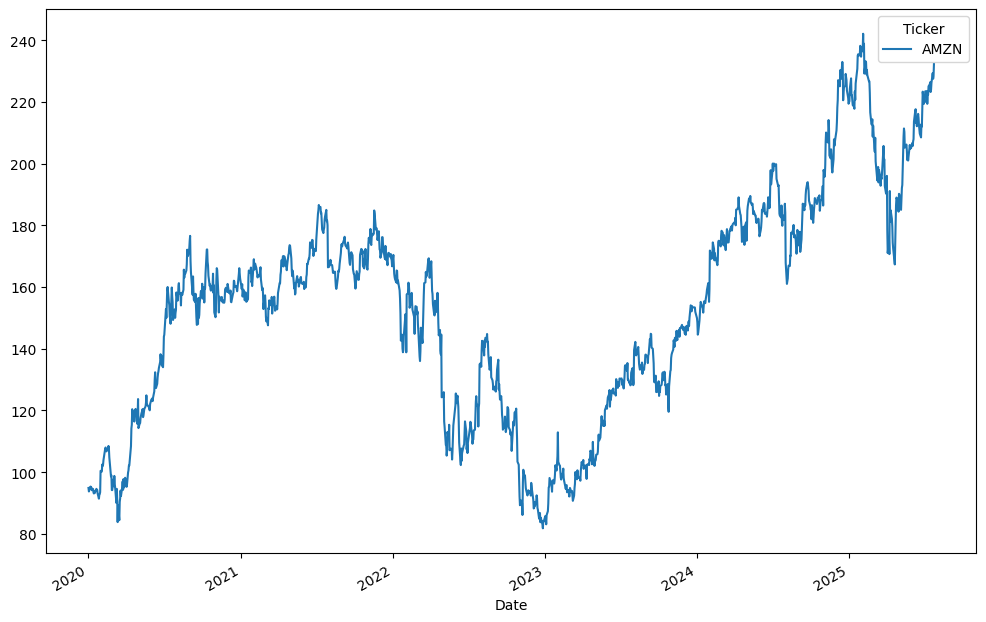

In [81]:
df.Close.plot(figsize=(12,8))

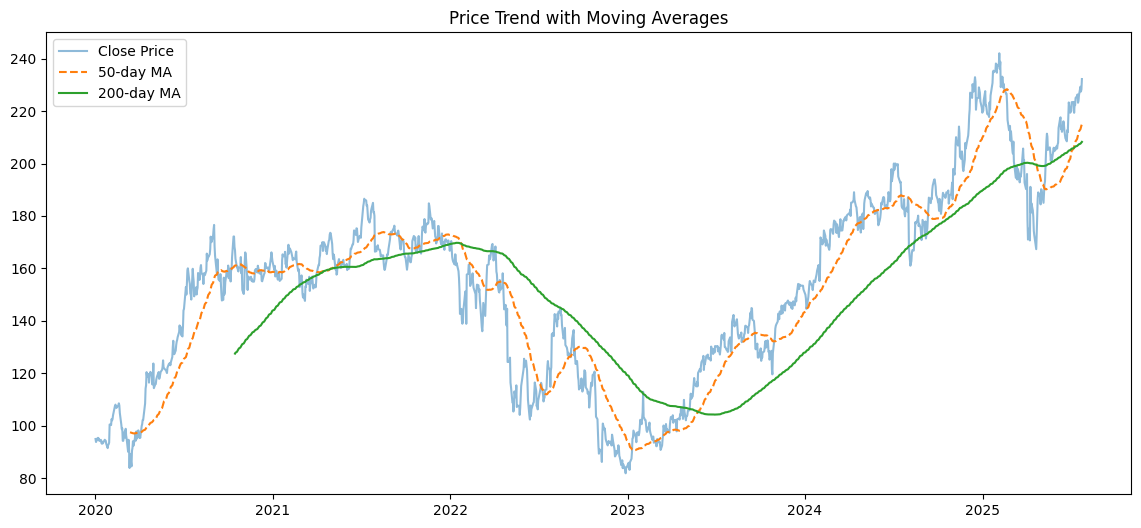

In [82]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Close'].rolling(50).mean(), label='50-day MA', linestyle='--')
plt.plot(df['Close'].rolling(200).mean(), label='200-day MA')
plt.title('Price Trend with Moving Averages')
plt.legend()
plt.show()

### Regression Models

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:

pipeline= Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [61]:

y_pred= pipeline.predict(X_test)

In [62]:

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


In [63]:
r2

0.9990733941157991

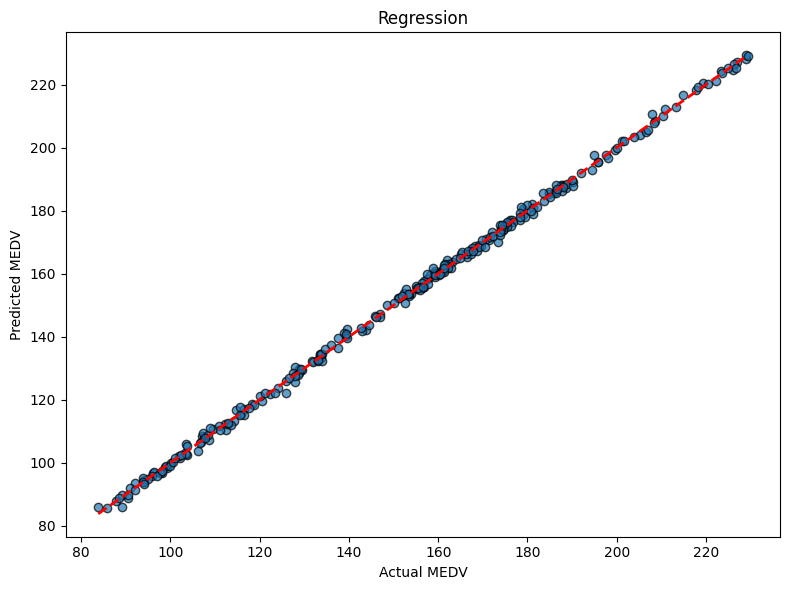

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.title('Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.tight_layout()
plt.show()

In [68]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


In [69]:

rf= RandomForestRegressor()
gb= GradientBoostingRegressor()
xgb= XGBRegressor()
svr= SVR()
dt= DecisionTreeRegressor()
knn= KNeighborsRegressor()

In [70]:
params_rf = {"model__n_estimators": [50, 100],
             "model__max_depth": [None, 10]}

params_xgb = {"model__n_estimators": [50, 100],
              "model__learning_rate": [0.05, 0.1],
              "model__max_depth": [3, 10]}

params_gb = {"model__n_estimators": [50, 100],
             "model__learning_rate": [0.05, 0.1],
             "model__max_depth": [3, 5]}

params_svr = {"model__kernel": ["rbf", "linear"],
              "model__C": [0.1, 1, 10]}

param_dt = {"model__max_depth": [None, 5, 10],
            "model__min_samples_split": [2, 5],
            "model__min_samples_leaf": [1, 2]}

param_knn = {"model__n_neighbors": [3, 5, 7],
             "model__weights": ["uniform", "distance"]}

In [71]:
models = {'RandomForestRegressor':{'model':rf,'params':params_rf},
          'GradientBoostingRegressor':{'model':gb, 'params':params_gb},
          'XGBRegressor':{'model':xgb, 'params':params_xgb},
          'SVR':{'model':svr, 'params':params_svr },
          'DecisionTreeRegressor':{'model':dt,'params':param_dt},
          'KNeighborsRegressor':{'model':knn,'params':param_knn}}

Training RandomForestRegressor...


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


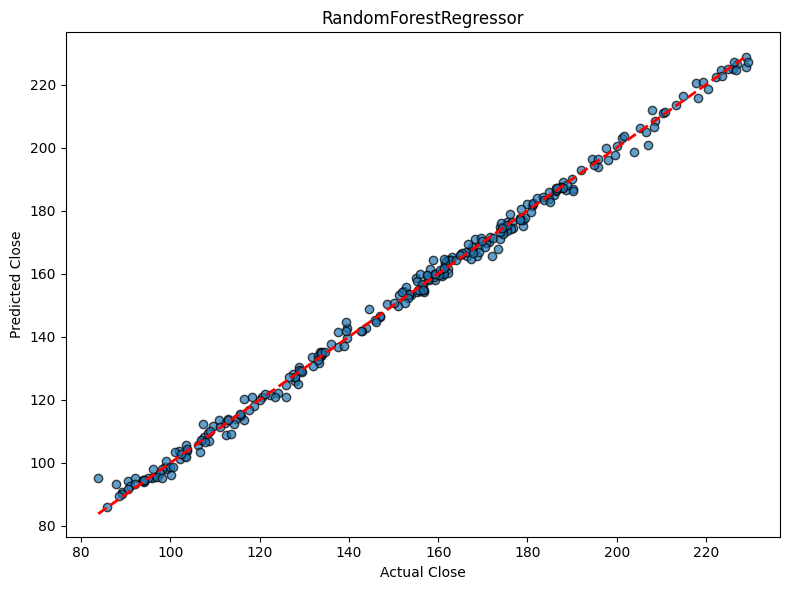

Training GradientBoostingRegressor...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


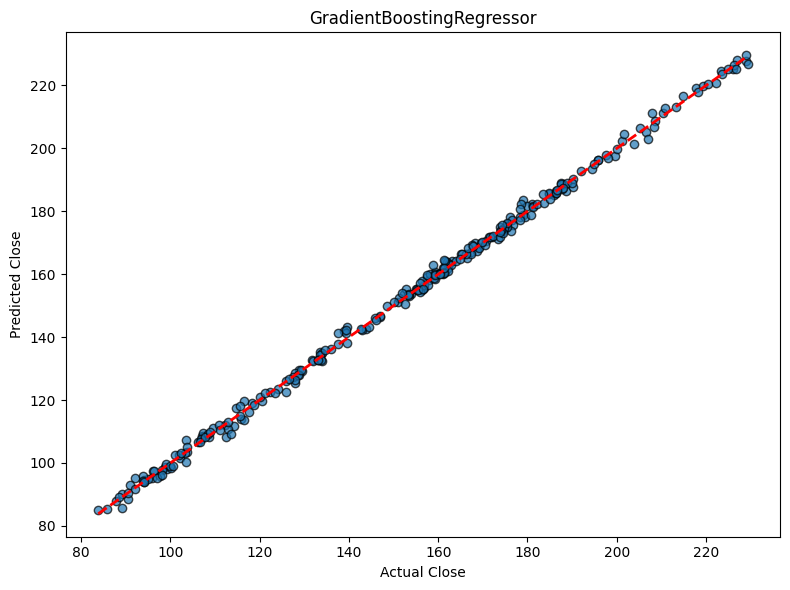

Training XGBRegressor...


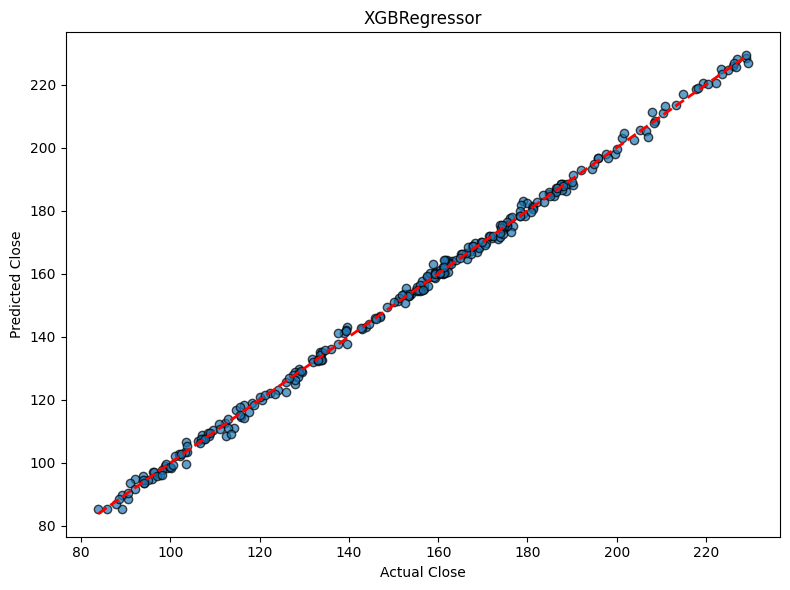

Training SVR...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


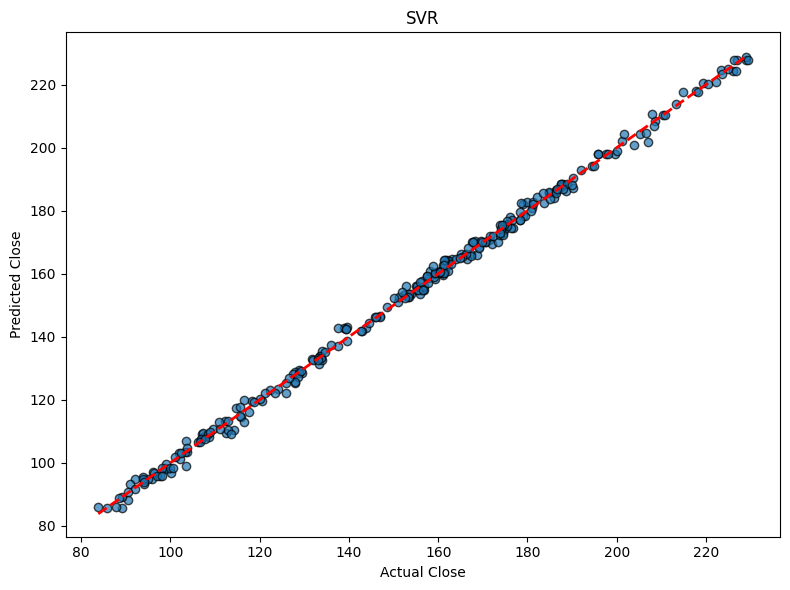

Training DecisionTreeRegressor...


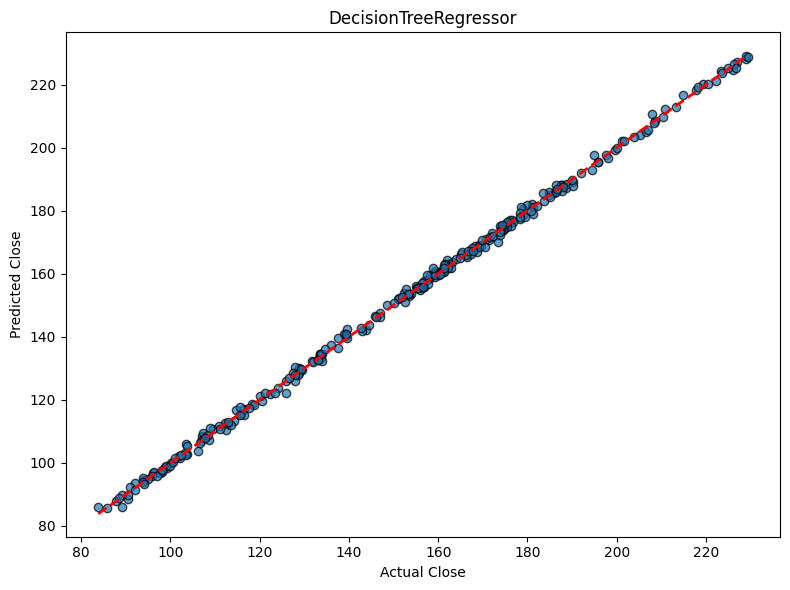

Training KNeighborsRegressor...


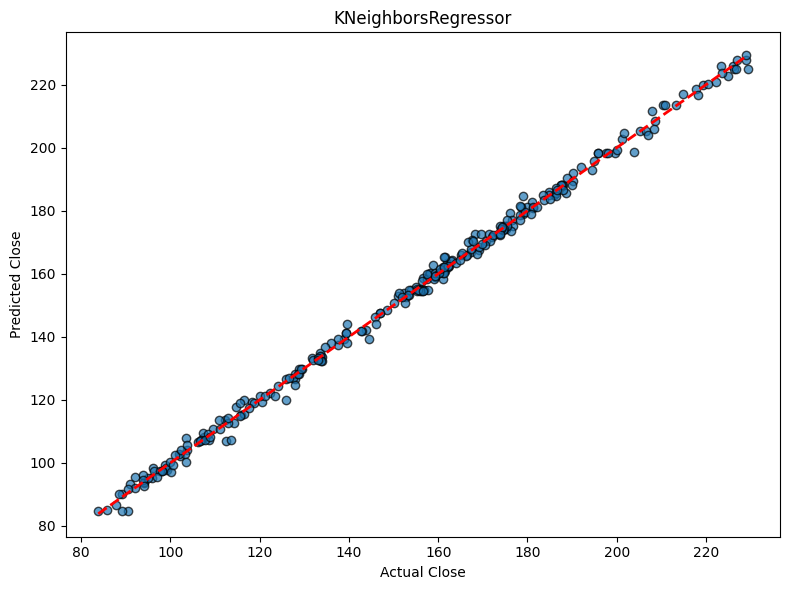

In [80]:
results= []
best_r_squared= 0
best_model_name=None

for name, mp in models.items():
    print(f"Training {name}...")
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', mp['model'])
    ])

    grid = GridSearchCV(pipe, mp['params'], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
    plt.xlabel('Actual Close')
    plt.ylabel('Predicted Close')
    plt.title(name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.tight_layout()
    plt.show()

    y_pred = grid.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append({
        "model": name,
        "r2": r2,
        "mse": mse
    })

    if r2 > best_r_squared:
        best_r_squared = r2
        best_model_name = name
        best_model_object = grid.best_estimator_

In [73]:

results_df = pd.DataFrame(results)

In [74]:
results_df

,model,r2,mse
0,RandomForestRegressor,0.998307,2.277802
1,GradientBoostingRegressor,0.998482,2.042728
2,XGBRegressor,0.998041,2.635784
3,SVR,0.999078,1.241253
4,DecisionTreeRegressor,0.997550,3.296986
5,KNeighborsRegressor,0.996915,4.151695


In [75]:
best_r_squared, best_model_name

(0.9990776713822792, 'SVR')

### LSTM Model

In [28]:

scaler = StandardScaler()
df['Close'] = scaler.fit_transform(df['Close'])

In [29]:
seq_length= 30
data= []

for i in range(len(df)- seq_length):
  data.append(df.Close[i: i+seq_length])

data= np.array(data)

In [30]:
data

array([[[-1.60680083],
        [-1.6386868 ],
        [-1.60006105],
        ...,
        [-1.25695477],
        [-1.24422256],
        [-1.25824187]],

       [[-1.6386868 ],
        [-1.60006105],
        [-1.59455283],
        ...,
        [-1.24422256],
        [-1.25824187],
        [-1.27900095]],

       [[-1.60006105],
        [-1.59455283],
        [-1.61515966],
        ...,
        [-1.25824187],
        [-1.27900095],
        [-1.25021499]],

       ...,

       [[ 1.67782664],
        [ 1.77221097],
        [ 1.78964874],
        ...,
        [ 1.96319482],
        [ 2.02547207],
        [ 2.11321376]],

       [[ 1.77221097],
        [ 1.78964874],
        [ 1.66758521],
        ...,
        [ 2.02547207],
        [ 2.11321376],
        [ 2.06256154]],

       [[ 1.78964874],
        [ 1.66758521],
        [ 1.66869259],
        ...,
        [ 2.11321376],
        [ 2.06256154],
        [ 2.08525792]]])

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim


train_size=int(0.8* len(data))

X_train= torch.from_numpy(data[:train_size, :-1, :]).type(torch.Tensor).to(device)
X_test = torch.from_numpy(data[train_size:, :-1, :]).type(torch.Tensor).to(device)
y_train = torch.from_numpy(data[:train_size, -1, :]).type(torch.Tensor).to(device)
y_test = torch.from_numpy(data[train_size:, -1, :]).type(torch.Tensor).to(device)

In [32]:
class PredictionModel(nn.Module):

  def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
    super(PredictionModel, self).__init__()

    self.hidden_dim = hidden_dim
    self.num_layers= num_layers

    self.lstm= nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self,x ):
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device=device)
      c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device=device)

      out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
      out= self.fc(out[:, -1, :])

      return out

In [33]:
model= PredictionModel(input_dim=1, hidden_dim=32, num_layers=2, output_dim=1).to(device)

In [34]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [35]:
num_epochs = 200

for i in range(num_epochs):
  y_train_pred= model(X_train)

  loss= loss_fn(y_train_pred, y_train)

  if i% 25 == 0:
    print(i, loss)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

0 tensor(0.7242, grad_fn=<MseLossBackward0>)
25 tensor(0.0207, grad_fn=<MseLossBackward0>)
50 tensor(0.0117, grad_fn=<MseLossBackward0>)
75 tensor(0.0103, grad_fn=<MseLossBackward0>)
100 tensor(0.0093, grad_fn=<MseLossBackward0>)
125 tensor(0.0086, grad_fn=<MseLossBackward0>)
150 tensor(0.0079, grad_fn=<MseLossBackward0>)
175 tensor(0.0075, grad_fn=<MseLossBackward0>)


In [36]:
model.eval()

y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().cpu().numpy())
y_train= scaler.inverse_transform(y_train.detach().cpu().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().cpu().numpy())
y_test= scaler.inverse_transform(y_test.detach().cpu().numpy())

In [37]:
train_rmse = root_mean_squared_error(y_train[:,0], y_train_pred[:,0])
test_rmse = root_mean_squared_error(y_test[:,0], y_test_pred[:,0])

In [38]:
train_rmse

3.081566333770752

In [39]:
test_rmse

6.969920635223389

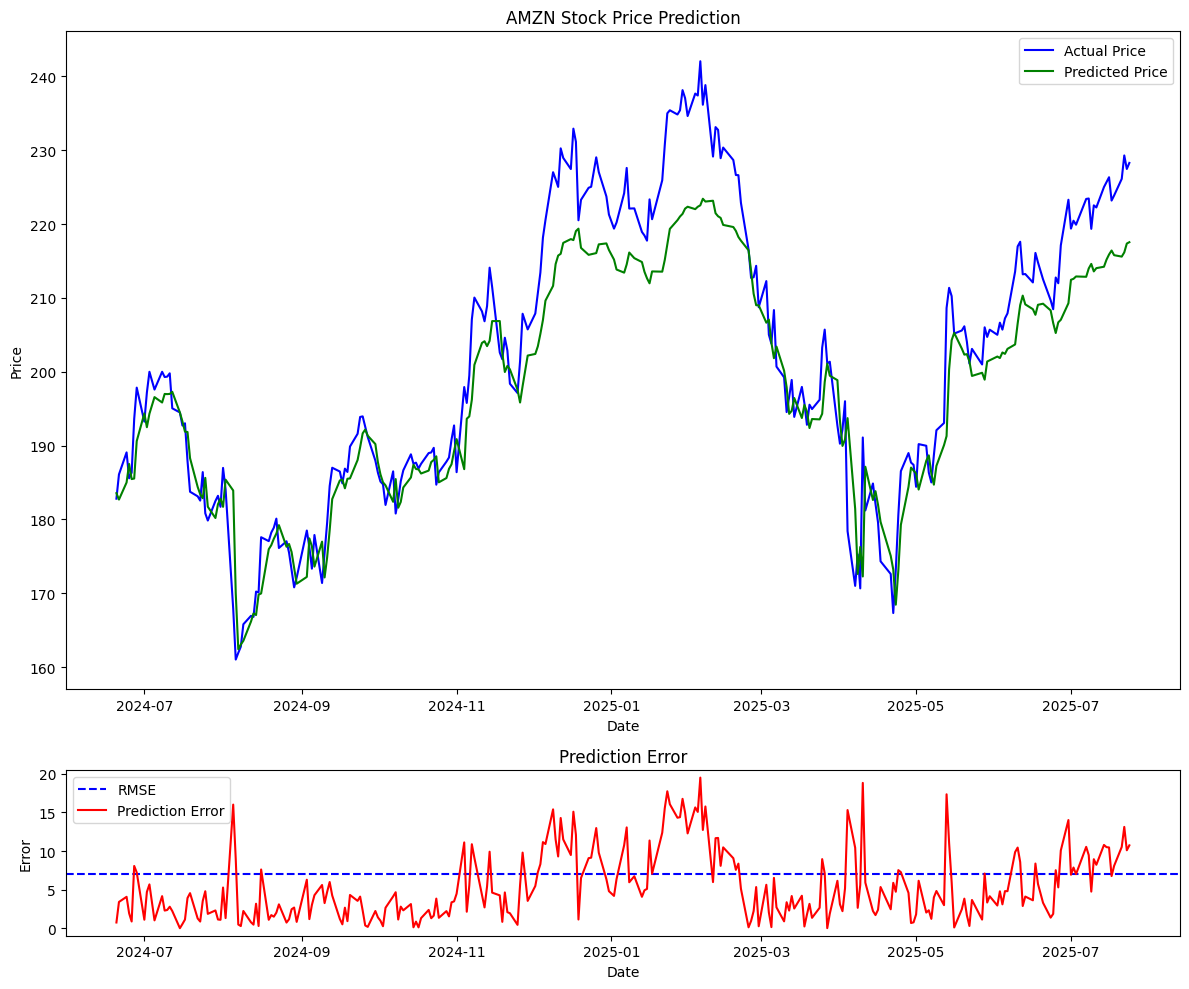

In [40]:
fig = plt.figure(figsize=(12,10))

gs= fig.add_gridspec(4,1)

ax1 = fig.add_subplot(gs[:3,0])
ax1.plot(df.iloc[-len(y_test):].index, y_test, color= 'blue', label= 'Actual Price')
ax1.plot(df.iloc[-len(y_test):].index, y_test_pred, color= 'green', label= 'Predicted Price')
ax1.legend()

plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")

ax2= fig.add_subplot(gs[3,0])
ax2.axhline(test_rmse, color= 'blue', linestyle= '--', label="RMSE")

ax2.plot(df[-len(y_test):].index, abs(y_test- y_test_pred), 'r', label='Prediction Error')
ax2.legend()
plt.title('Prediction Error')
plt.xlabel("Date")
plt.ylabel("Error")
plt.tight_layout()


plt.show()